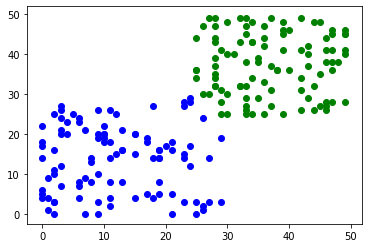

In [74]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
rand_array = np.random.randint(low=0, high=30, size=(100, 2))  
rand_array1 = np.random.randint(low=25, high=50, size=(100, 2))
x = rand_array[:, [0]] 
y = rand_array[:,[1]]

x1 = rand_array1[:, [0]]
y1 = rand_array1[:, [1]]

plt.scatter(x,y, color = 'blue')
plt.scatter(x1,y1, color = 'green')
plt.show()

In [89]:
Y = np.ones(200)
Y[:100] = 0
X = np.concatenate((rand_array, rand_array1))
# print(X)

In [90]:
def dist(x,x1):
    return np.sqrt(np.sum(np.power(np.subtract(x,x1),2)))

In [93]:
def KNN(X,Y,queryPoint,k=7):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
#     print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
#     print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [94]:
KNN(X,Y,[27,30])

1.0

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [96]:
print(X_train.shape,X_test.shape)

(140, 2) (60, 2)


In [97]:
print(Y_train.shape,Y_test.shape)

(140,) (60,)


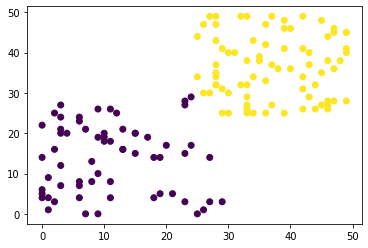

In [98]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

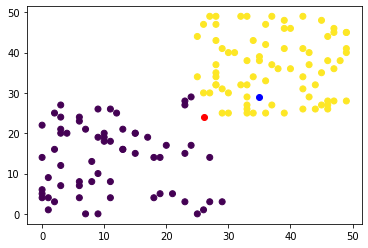

In [102]:
query_1 = X_test[6]
query_2 = X_test[40]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.scatter(query_1[0],query_1[1],color="red")
plt.scatter(query_2[0],query_2[1],color="blue")
plt.show()

In [103]:
def score(X_train,X_test,Y_train,Y_test):
    
    m = X_test.shape[0]
    
    y_pred = []
    
    for i in range(m):
        pred = KNN(X_train,Y_train,X_test[i])
        y_pred.append(pred)
    
    acc = accuracy_score(Y_test, y_pred)
    
    return acc

In [104]:
score(X_train,X_test,Y_train,Y_test)

0.95